In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv("Black_friday_sales.csv")

In [3]:
ds

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
ds.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
ds.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550058,1006024,P00372445,M,26-35,12,A,0,1,20,NaN,NaN,121
550059,1006025,P00370853,F,26-35,1,B,1,0,19,NaN,NaN,48
550060,1006026,P00371644,M,36-45,6,C,1,1,20,NaN,NaN,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,NaN,NaN,599
550062,1006032,P00372445,M,46-50,7,A,3,0,20,NaN,NaN,473
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [6]:
ds.shape

(550068, 12)

In [7]:
ds.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
ds.duplicated().sum() #Checking the number of duplicated items in the given DataSet

0

In [10]:
ds.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [96]:
ds['Product_Category_2'].fillna(int(ds['Product_Category_2'].mean()),inplace=True)

In [98]:
ds['Product_Category_3'].fillna(int(ds['Product_Category_3'].mean()),inplace=True)

In [99]:
ds.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [100]:
le=LabelEncoder()
ds['Age']=le.fit_transform(ds['Age'])

In [101]:
ds

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,1,20,9.842329,12.668243,368
550064,1006035,P00375436,0,2,1,2,3,0,20,9.842329,12.668243,371
550065,1006036,P00375436,0,2,15,1,4,1,20,9.842329,12.668243,137
550066,1006038,P00375436,0,6,1,2,2,0,20,9.842329,12.668243,365


In [102]:
ds['Gender']=le.fit_transform(ds['Gender'])

In [103]:
ds

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,1,20,9.842329,12.668243,368
550064,1006035,P00375436,0,2,1,2,3,0,20,9.842329,12.668243,371
550065,1006036,P00375436,0,2,15,1,4,1,20,9.842329,12.668243,137
550066,1006038,P00375436,0,6,1,2,2,0,20,9.842329,12.668243,365


In [104]:
ds['Stay_In_Current_City_Years']=le.fit_transform(ds['Stay_In_Current_City_Years'])

In [105]:
ds['City_Category']=le.fit_transform(ds['City_Category'])

In [106]:
ds

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,1,20,9.842329,12.668243,368
550064,1006035,P00375436,0,2,1,2,3,0,20,9.842329,12.668243,371
550065,1006036,P00375436,0,2,15,1,4,1,20,9.842329,12.668243,137
550066,1006038,P00375436,0,6,1,2,2,0,20,9.842329,12.668243,365


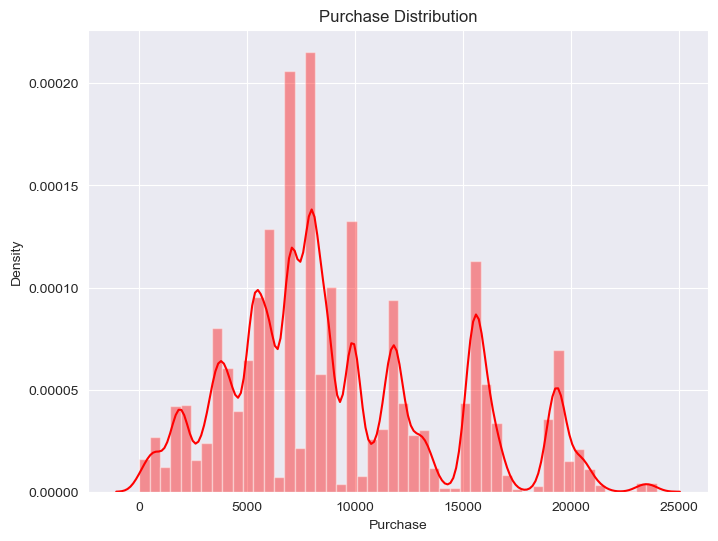

In [107]:
sns.distplot(ds["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

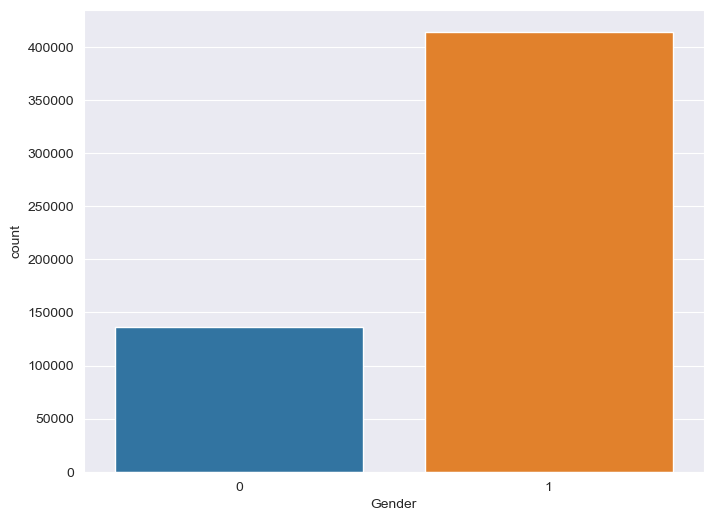

In [108]:
sns.countplot(ds['Gender'])
plt.show()

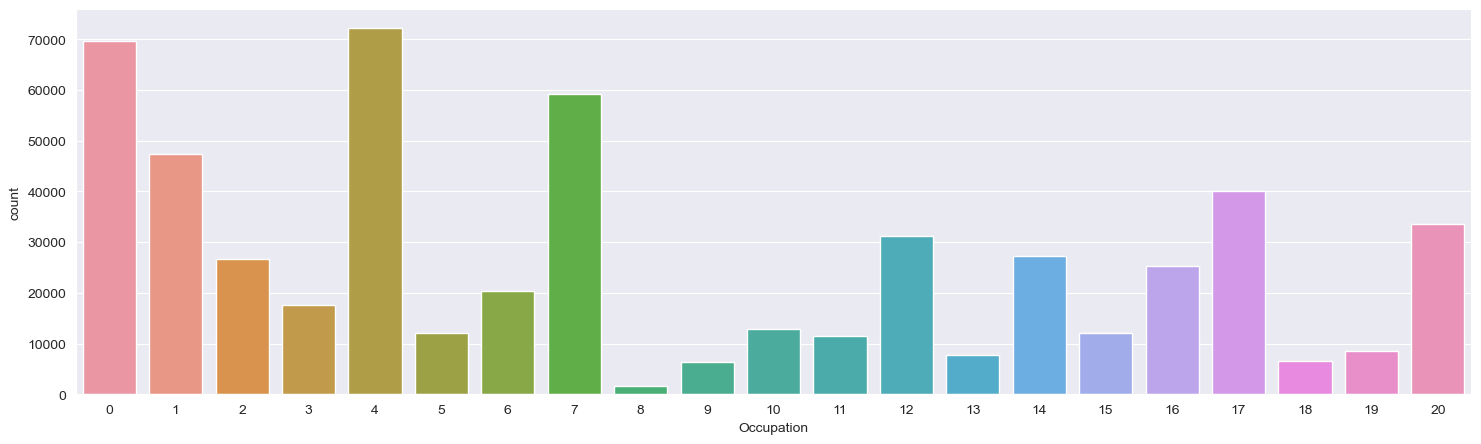

In [109]:
plt.figure(figsize=(18,5))
sns.countplot(ds['Occupation'])
plt.show()

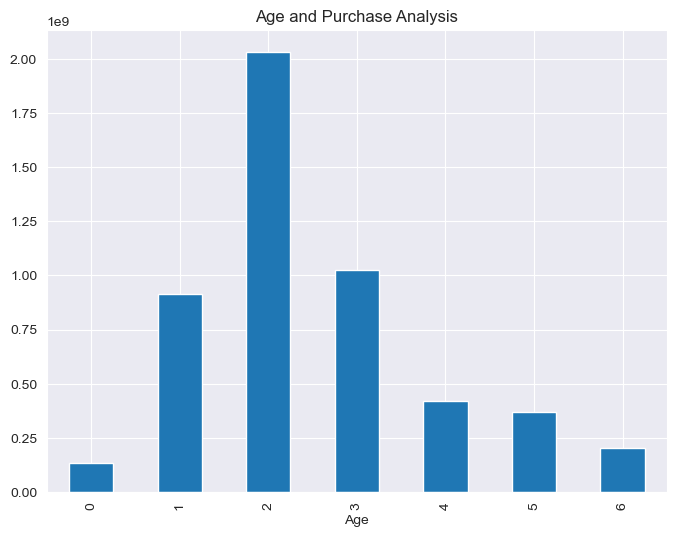

In [110]:
ds.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

In [111]:
X = ds.drop(["Gender","City_Category","Stay_In_Current_City_Years","Marital_Status","User_ID","Product_ID","Purchase","Age","Occupation"],axis=1)
y=ds['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [112]:
X_train

,Product_Category_1,Product_Category_2,Product_Category_3
532017,1,15.000000,16.000000
153907,1,8.000000,17.000000
162868,5,15.000000,12.668243
75278,8,14.000000,12.668243
525591,5,14.000000,12.668243
...,...,...,...
359783,6,10.000000,13.000000
152315,8,9.842329,12.668243
117952,5,9.842329,12.668243
435829,2,4.000000,12.668243


In [113]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [114]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [115]:
y_pred = lr.predict(X_test)
y_pred

array([11389.50762485,  6562.15537257,  9358.13301354, ...,
       10655.60242267, 10859.54709112,  9583.07775246])

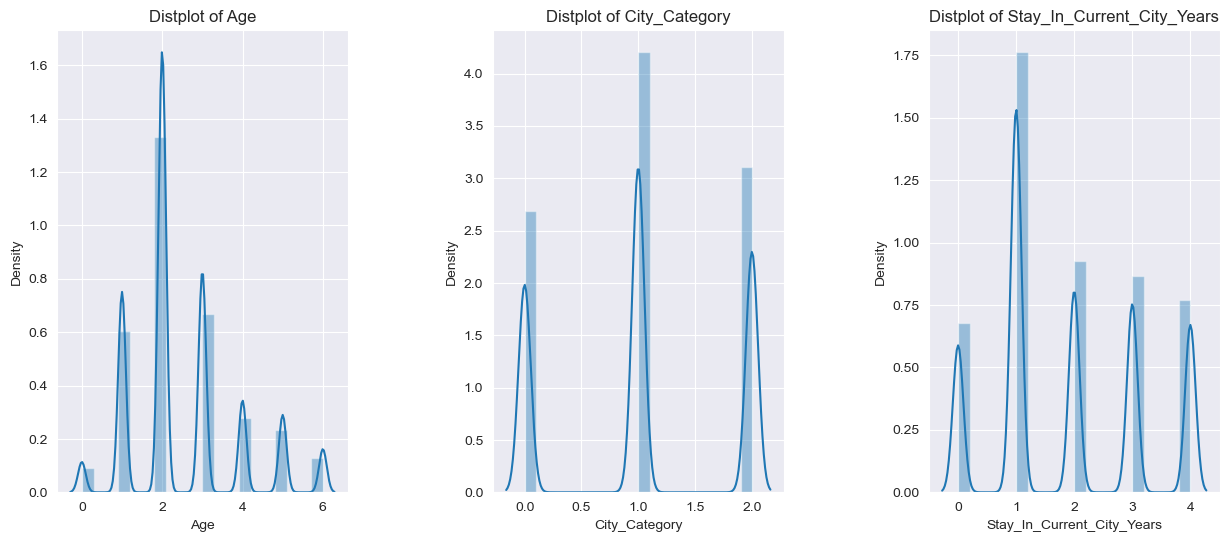

In [116]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','City_Category','Stay_In_Current_City_Years']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(ds[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

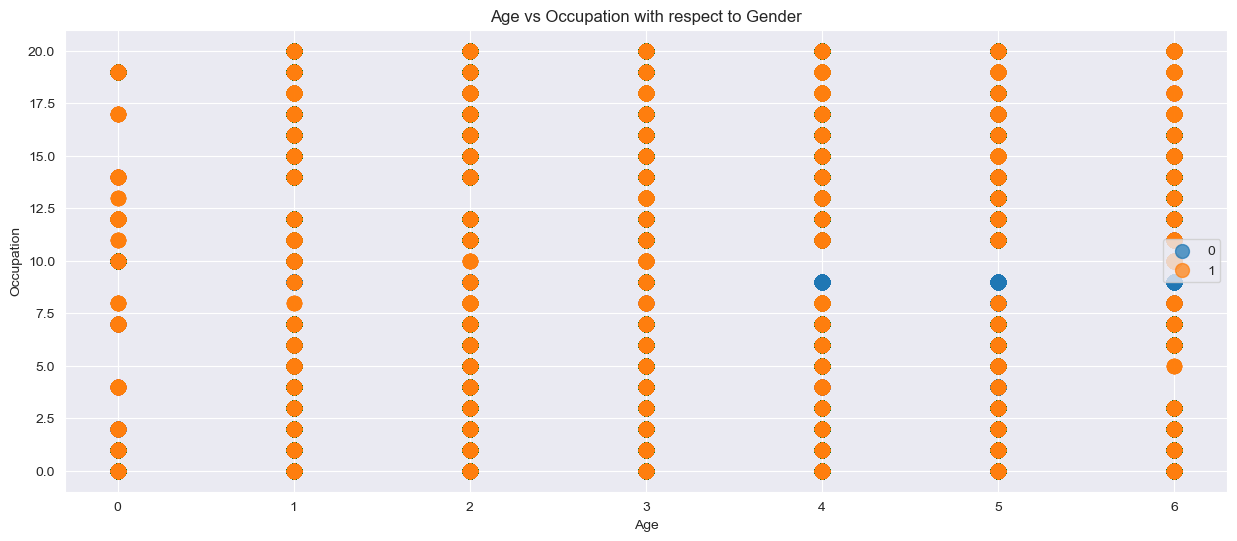

In [117]:
plt.figure(1,figsize=(15,6))
for gender in [0,1]:
    plt.scatter(x='Age',y='Occupation',data=ds[ds['Gender']==gender],s=100,alpha=0.72,label=gender)
plt.xlabel('Age'),plt.ylabel('Occupation')
plt.title('Age vs Occupation with respect to Gender')
plt.legend()
plt.show()

In [118]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (385047, 3)
X_test shape: (165021, 3)
Y_train shape: (385047,)
Y_test shape: (165021,)


In [119]:
log_score = r2_score(y_test,y_pred) 
print("The Accuracy is ",log_score)

The Accuracy is  0.12153718578471451


In [120]:
clf_dt = DecisionTreeRegressor(random_state=0)
clf_dt.fit(X_train,y_train) 
y_pred = clf_dt.predict(X_test)
dct_score = r2_score(y_test,y_pred)    
print('Accuracy using Decision Tree Classifier:',dct_score)

Accuracy using Decision Tree Classifier: 0.6590546667651851


In [121]:
rand_for = RandomForestRegressor(n_estimators=100, random_state=0)
rand_for.fit(X_train,y_train)
y_pred = rand_for.predict(X_test)
rfd_score = r2_score(y_test,y_pred)
print('Accuracy using Random Forest Classifier:',rfd_score)

Accuracy using Random Forest Classifier: 0.6590572734426405


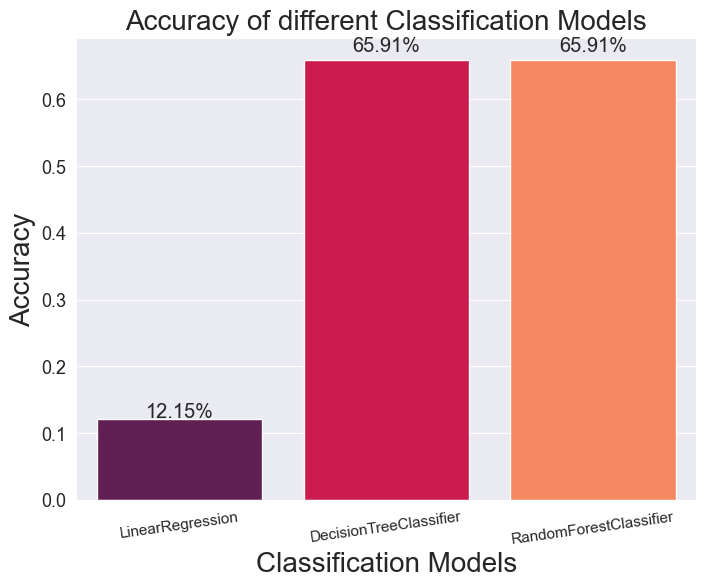

In [122]:
mylist=[]
mylist2=[]
mylist.append(log_score)
mylist2.append("LinearRegression")
mylist.append(dct_score)
mylist2.append("DecisionTreeClassifier")
mylist.append(rfd_score)
mylist2.append("RandomForestClassifier")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()